In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

49.59502501799898 -49.49528035255881
14.66279971446913 -12.161265358677156
-54.07652124912963 -2.45532952520378
64.2407485662722 98.74229434383244
28.422554500775178 78.34951641223608
17.52277153294216 76.66619024672394
80.34357011857247 -28.941355024033868
9.674268402801786 -7.763470354123797
-7.511534313028932 -50.71295501946204
-58.40993895679276 -83.99399064900352
-34.349935522509604 -125.68966425569675
39.93336749975512 -103.89237598228166
-22.774619691972447 -177.11359266455727
70.40399240526673 176.10319741670736
-74.3778590721618 46.88051600443714
55.55357229343758 -139.49689394535682
44.86603127585096 -59.76425335240026
-86.65966649487268 -133.43258706295538
-12.426469619300917 -6.707940889963396
49.73323674441747 -128.4297465678838
68.9610129139233 151.38790224841136
-89.74822683342727 131.92326922915805
1.1029676871909402 88.73397528456496
39.84752547063721 -58.85366731450084
-1.7938005928559875 73.20578512180518
-12.677950940410028 170.1644314805232
-31.93454625023776 -167.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | bakel
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | gawan
Processing Record 6 of Set 1 | aland
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | odienne
Processing Record 9 of Set 1 | sao felix do xingu
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | fort morgan
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | port hardy
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | hobart
Processing

Processing Record 38 of Set 4 | visby
Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | kattivakkam
Processing Record 43 of Set 4 | doha
Processing Record 44 of Set 4 | catuday
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | puerto leguizamo
Processing Record 47 of Set 4 | tarudant
City not found. Skipping...
Processing Record 48 of Set 4 | pamekasan
Processing Record 49 of Set 4 | todos santos
Processing Record 50 of Set 4 | dali
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | teahupoo
Processing Record 3 of Set 5 | ust-omchug
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | gizo
Processing Record 6 of Set 5 | hazorasp
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | garanhuns
Processing Record 10 of Set 5 | co

Processing Record 26 of Set 8 | sugod
Processing Record 27 of Set 8 | tema
Processing Record 28 of Set 8 | cayenne
Processing Record 29 of Set 8 | sao jose da coroa grande
Processing Record 30 of Set 8 | foki
Processing Record 31 of Set 8 | beidao
Processing Record 32 of Set 8 | merrill
Processing Record 33 of Set 8 | macduff
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | susurluk
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | seydi
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | gazojak
Processing Record 40 of Set 8 | port augusta
Processing Record 41 of Set 8 | varkaus
Processing Record 42 of Set 8 | saint anthony
Processing Record 43 of Set 8 | aybak
City not found. Skipping...
Processing Record 44 of Set 8 | palafrugell
Processing Record 45 of Set 8 | kahului
Processing Record 46 of Set 8 | saint-francois
Processing Record 47 of Set 8 | thinadhoo
Processing Record 48 of Set 8 | san-pedro
Processing Recor

Processing Record 13 of Set 12 | qena
Processing Record 14 of Set 12 | prince albert
Processing Record 15 of Set 12 | ortigueira
Processing Record 16 of Set 12 | stolin
Processing Record 17 of Set 12 | shanhetun
Processing Record 18 of Set 12 | calbuco
Processing Record 19 of Set 12 | naryan-mar
Processing Record 20 of Set 12 | ellisras
Processing Record 21 of Set 12 | huilong
Processing Record 22 of Set 12 | lima
Processing Record 23 of Set 12 | caibarien
Processing Record 24 of Set 12 | uyuni
Processing Record 25 of Set 12 | amahai
Processing Record 26 of Set 12 | gat
Processing Record 27 of Set 12 | bonnyville
Processing Record 28 of Set 12 | porto nacional
Processing Record 29 of Set 12 | strezhevoy
Processing Record 30 of Set 12 | mehamn
Processing Record 31 of Set 12 | pisco
Processing Record 32 of Set 12 | poltavka
Processing Record 33 of Set 12 | aden
Processing Record 34 of Set 12 | acapulco
Processing Record 35 of Set 12 | miraflores
Processing Record 36 of Set 12 | katherine

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,57.09,71,100,19.62,CA,2022-06-11 18:49:13
1,Bakel,14.9050,-12.4568,103.73,19,13,6.42,SN,2022-06-11 18:49:14
2,Cape Town,-33.9258,18.4232,69.28,44,0,8.99,ZA,2022-06-11 18:49:15
3,Tura,25.5198,90.2201,73.92,98,88,8.37,IN,2022-06-11 18:49:16
4,Gawan,28.4333,78.3500,96.22,14,44,5.99,IN,2022-06-11 18:49:16
5,Aland,17.5667,76.5667,80.17,65,80,16.75,IN,2022-06-11 18:49:17
6,Odienne,9.5100,-7.5692,80.71,66,100,7.20,CI,2022-06-11 18:49:17
7,Sao Felix Do Xingu,-6.6447,-51.9950,87.44,51,95,2.68,BR,2022-06-11 18:49:18
8,Punta Arenas,-53.1500,-70.9167,44.71,87,75,9.22,CL,2022-06-11 18:49:18
9,Rikitea,-23.1203,-134.9692,74.35,78,13,10.51,PF,2022-06-11 18:49:18


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2022-06-11 18:49:13,48.6499,-53.1147,57.09,71,100,19.62
1,Bakel,SN,2022-06-11 18:49:14,14.9050,-12.4568,103.73,19,13,6.42
2,Cape Town,ZA,2022-06-11 18:49:15,-33.9258,18.4232,69.28,44,0,8.99
3,Tura,IN,2022-06-11 18:49:16,25.5198,90.2201,73.92,98,88,8.37
4,Gawan,IN,2022-06-11 18:49:16,28.4333,78.3500,96.22,14,44,5.99
5,Aland,IN,2022-06-11 18:49:17,17.5667,76.5667,80.17,65,80,16.75
6,Odienne,CI,2022-06-11 18:49:17,9.5100,-7.5692,80.71,66,100,7.20
7,Sao Felix Do Xingu,BR,2022-06-11 18:49:18,-6.6447,-51.9950,87.44,51,95,2.68
8,Punta Arenas,CL,2022-06-11 18:49:18,-53.1500,-70.9167,44.71,87,75,9.22
9,Rikitea,PF,2022-06-11 18:49:18,-23.1203,-134.9692,74.35,78,13,10.51


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

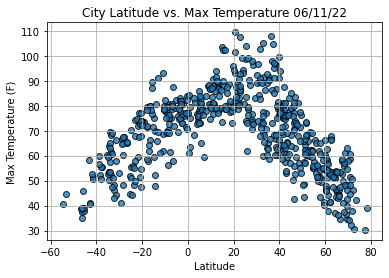

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

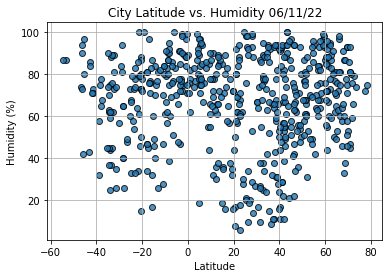

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

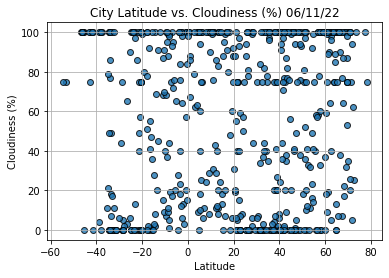

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

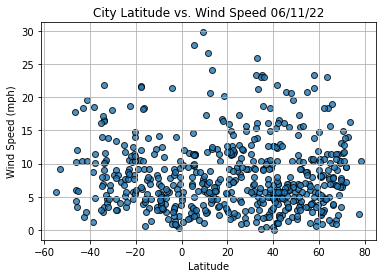

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()